# TQSim: Topological Quantum Simulator (Tutorial)
## with Fibonacci anyons

<hr>

<table width="100%"><tr><td style="color:#bbbbbb;background-color:#ffffff;font-size:11px;font-style:italic;text-align:right;">This cell contains some macros. If there is a problem with displaying mathematical formulas, please run this cell to load these macros. </td></tr></table>
$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\dot}[2]{ #1 \cdot #2} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\stateplus}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\stateminus}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $
$ \newcommand{\pstate}[1]{ \lceil \mspace{-1mu} #1 \mspace{-1.5mu} \rfloor } $
$ \newcommand{\qgate}[1]{ \mathop{\textit{#1} } }$

This is a brief tutorial to implement simple topological quantum circuits with TQSim.

Quantum simulators are very important to understand the behavior of real quantum computers and test quantum algorithms. Since the topological quantum computers do not exist yet, it is convenient to work on a simulator to better understand how quantum computation would look like on a topological quantum computer. For this purpose, CQTech team have designed an open-source simulator in Python to help students and quantum computing enthusiasts to have the opportunity to program a topological quantum simulator.

The main challenging difference between the topological quantum computers and the other quantum computing platforms is the fact that the former is based on the fusion space of anyons which has different structure than the qubits. Therefore, this tutorial will help you practice how the fusion states of anyons is non-trivially split to computational states and non-computational states.

As all quantum simulators, this topological quantum simulator is limited in the number of anyons or qubits that it can simulate in a reasonable time since the fusion space of anyons grows exponentially and the computational work to build braiding matrices, store them and multiply them will be more expansive in case of large number of anyons. Therefore, the topological quantum computation simulator can be work ably up to 12 anyons. For practical purposes, it is better to work with 3 and 4 anyons per qubit as you can deduce from the previous notebooks.

*We highly encourage you to implement your quantum ideas on the topological quantum simulator and provide your feedback. You are also welcome to contribute to the simulator on [GitHub](https://github.com/Constantine-Quantum-Tech/tqsim).*


## Content

1. [Single qubit topological circuit](#100)
    1. [Circuit initialization](#110)
    1. [Braiding](#120)
1. [Multi-qubit topological circuit](#200)

<hr>
<a id="100"></a>

## 1. Single Qubit Topoligical Circuit

<a id="110"></a>

### Circuit initialization

To simulate a topological quantum circuit, TQSim offers the **AnyonicCircuit** class which lets you easily create a circuit of topological qudits made of anyons.

So we start by importing it from tqsim.

*Note: we will also import LaTex from IPython for later use.*

In [60]:
from tqsim import AnyonicCircuit
from IPython.display import Latex  # Needed to print LaTeX outputs

We then create a circuit by specifying the number of qudits it contains, and the number of anyons that make each qudit. The circuit will thus contain $N_{qudits} \times N_{anyons/qudit}$ anyons in total.

In the example bellow, we will create 1 qudit that is made of 3 anyons.

In [61]:
# Creating a topological quantum circuit
# By default, the circuit is initialized in the first state [1, 0, ..., 0]
circuit = AnyonicCircuit(nb_qudits=1, nb_anyons_per_qudit=3)

<div class="alert alert-block alert-info"> <b>Note: </b> The qudit is a quantum state of $d$ complex components eg. $\left(\begin{array}{c}1\\ 0\\ 0\end{array}\right)$. The qubit is a quantum state of $2$ complex components eg. $\left(\begin{array}{c}1\\ 0\end{array}\right)$.</div>

As shown above, _AnyonicCircuit_ has two parameters:
1. _nb\_qudits_ : which is the number of qudits in the circuit.
2. _nb\_anyons\_per\_qudit_ : which is the number of anyons per qudit, typically 3 or 4.

By default, *AnyonicCircuit()* will create 1 qudit with 3 anyons. So we could have created the same circuit using:

In [62]:
circuit = AnyonicCircuit()  # Using the default values.

Now that we have our circuit we may choose to initialize it in a given state. By default, the circuit is initialized in the 1st qudit state.<br>
In our example, our single qudit has a dimension of 3. We can check this using the *dim* property of the circuit.

In [64]:
print('This circuit can encode', circuit.dim, 'possible basis states.')

This circuit can encode 3 possible basis states.


We can see what these states are by printing the circuit basis.

In [66]:
circuit.basis

[{'qudits': [[1, 0]], 'roots': []},
 {'qudits': [[0, 1]], 'roots': []},
 {'qudits': [[1, 1]], 'roots': []}]

These are the 3 basis states that this circuit can encode. We will ignore the *roots* for now and focus on the qudits.

For each basis state, *'qudits'* contains the states of all the qudits in the circuit. Since we only have 1 qudit in our circuit, each basis state only has 1 qudit.<br>

A 3-anyons qudit is represented by its successive fusion outcomes $i$ and $j$. (see the [Anyons](tqc/B00_Anyons.ipynb) notebook)

        1 1 1 
        \/  / 
        i\ / 
          \    
          j\   

Each qudit in the basis states above encodes $i$ and $j$ in a list that contains both values. Therefor, we may read the output of *circuit.basis* as follows:

* **[[1, 0]] $\rightarrow$ basis[0]** : a 1 qudit state where $i=1$ and $j=0$. This is the non-computational state $\ket{NC}$.
* **[[0, 1]] $\rightarrow$ basis[1]** : a 1 qudit state where $i=0$ and $j=1$. This is the basis state $\ket{0}$.
* **[[1, 1]] $\rightarrow$ basis[2]** : a 1 qudit state where $i=1$ and $j=1$. This is the basis state $\ket{1}$.

Since the circuit is initialized by default the the first basis state, our single qudit is thus in the state $\ket{NC}$, which is not useful to us. To change that, we will initialize the circuit in the $\ket{0}$ basis state.

In [67]:
circuit.initialize([0,1,0])

The qudit is now in the $\ket{0}$ state, and we can start doing some computation on it.

<hr>
<a id="120"></a>

### Braiding

In [25]:
# Apply clockwise braiding operations
circuit.braid(1, 2)  # On the 1st and 2nd anyons
circuit.braid(2, 3)  # On the 2nd and 3rd anyons

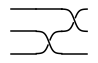

In [26]:
# Drawing the braiding circuit
circuit.draw()

In [27]:
### Apply counter-clockwise braiding operations
circuit.braid(2, 1)  # On the 2nd and 1st anyons
circuit.braid(3, 2)  # On the 3rd and 2nd anyons

Once you flip the indices of braided anyons, you get the inverse braiding operation.

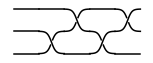

In [28]:
# Drawing the braiding circuit
circuit.draw()

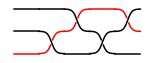

In [29]:
# Highlight given strands with specific colors
circuit.drawer.anyons[1].color = "red"  # Coloring the 1st anyon in red.
circuit.draw()

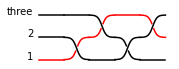

In [30]:
# Labeling the anyons
circuit.drawer.anyons[1].label = 1  # Labeling the 1st anyon using an int
circuit.drawer.anyons[2].label = '2'  # Labeling the 2nd anyon using a number as a string
circuit.drawer.anyons[3].label = 'three'  # Labeling the 3rd anyon using text
circuit.draw()

In [31]:
# Print the braiding sequences
print('History of braiding operations:', circuit.history())

History of braiding operations: [(2, 1), (3, 2), (1, 2), (2, 3)]


In [32]:
# Print the braiding sequences in terms of 
Latex(circuit.history("latex"))

<IPython.core.display.Latex object>

In [33]:
# Get the unitary of the braiding circuit
print(circuit.unitary())

[[ 1.        +0.j          0.        +0.j          0.        +0.j        ]
 [ 0.        +0.j          0.19098301+0.58778525j  0.63600982-0.46208819j]
 [ 0.        +0.j         -0.63600982-0.46208819j  0.19098301-0.58778525j]]


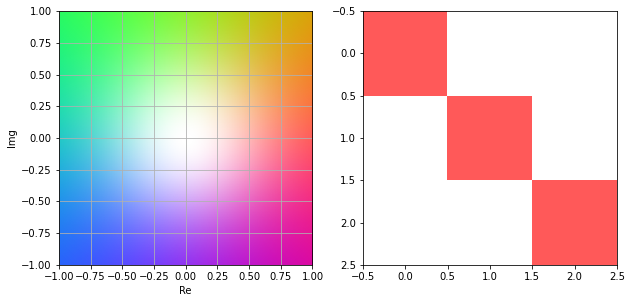

In [45]:
from tqsim import cplot
cplot(circuit.unitary())

In [35]:
# Get the basis
circuit.basis

[{'qudits': [[1, 0]], 'roots': []},
 {'qudits': [[0, 1]], 'roots': []},
 {'qudits': [[1, 1]], 'roots': []}]

The basis involves the complete set of fusion states including the non-computational states. The general form of the fusion basis is given by the following fusion diagram.



3 anyons fusion state :

        1 1 1 
        \/  / 
        i\ / 
          \    
          j\   

            
This state is represented by Python dict :

        {'qudits': [[i, j]] 'roots': []}


In [36]:
# Measure the circuit by fusing all 
circuit.measure()

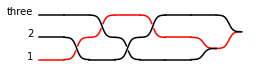

In [37]:
circuit.draw()

In [38]:
# Get the result of measurement in given number of shots for given input state
result = circuit.run(shots=1000)

In [39]:
print(result)

{'counts': {'0': 1000}, 'memory': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0

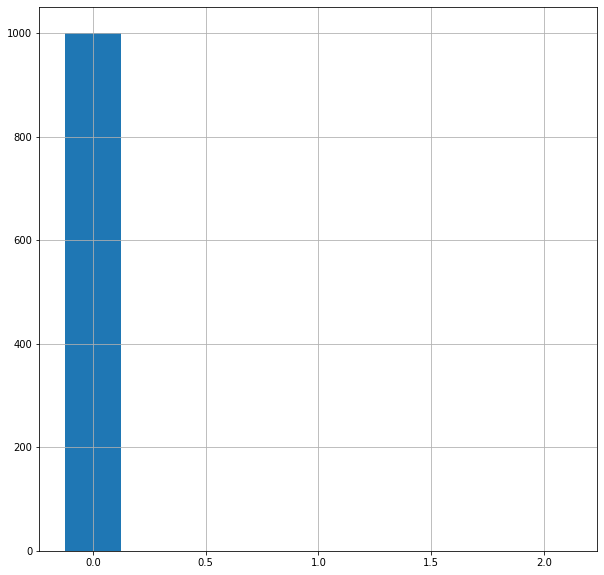

In [40]:
# Show the histogram of measurement results
import matplotlib.pyplot as plt
plt.hist(result['memory'], [0, 1, 2, 3], align='left', rwidth=0.25)
plt.grid()
plt.show()

We can also use TQSim with the $\sigma_i$ braiding operators using the *braid_sequence(seq)* method, which takes a sequence of braiding operators and their respective exponents, and applies it to the circuit.

In [41]:
circuit = AnyonicCircuit()  # By default, the number of qudits is 1, and it has 3 anyons per qudits.

<hr>
<a id="200"></a>

## 2. Multi-Qubit Topological Circuit

    Example: nb_qudits = 3, nb_anyons_per_qudit = 3
    
        1 1 1 1 1 1 1 1 1
        \/  / \/  / \/  /
        i\ /  k\ /  e\ /
          \     /     /
          j\  l/     /f
            \ /     / 
            m\     /
              \   /
               \ /
               t|
  
    This state is represented by the following Python dict:
    
        {'qudits': [[i, j], [k, l], [e, f]], 'roots': [m, t]}

In [28]:
circuit = AnyonicCircuit(nb_qudits=2, nb_anyons_per_qudit=4)

In [29]:
circuit.braid(1, 2)
circuit.braid(2, 3)
circuit.braid(3, 4)
circuit.braid(4, 5)
circuit.braid(5, 6)

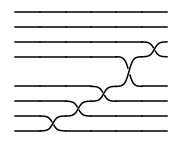

In [30]:
circuit.draw()

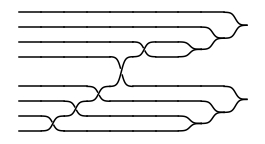

In [31]:
# Measure the fusion circuit
circuit.measure()
circuit.draw()

In [32]:
# The dimension of the basis
circuit.dim

34

In [33]:
# The unitary of the circuit
circuit.unitary()

array([[-0.30901699+0.22451399j, -0.39307569+0.2855862j ,
         0.        +0.j        , ...,  0.        +0.j        ,
         0.        +0.j        ,  0.        +0.j        ],
       [-0.39307569+0.2855862j ,  0.30901699-0.22451399j,
         0.        +0.j        , ...,  0.        +0.j        ,
         0.        +0.j        ,  0.        +0.j        ],
       [ 0.        +0.j        ,  0.        +0.j        ,
        -0.11803399-0.36327126j, ...,  0.        +0.j        ,
         0.        +0.j        ,  0.        +0.j        ],
       ...,
       [ 0.        +0.j        ,  0.        +0.j        ,
         0.        +0.j        , ..., -0.02786405+0.36327126j,
        -0.02786405+0.36327126j,  0.02190536-0.2855862j ],
       [ 0.        +0.j        ,  0.        +0.j        ,
         0.        +0.j        , ...,  0.        +0.j        ,
         0.39918694+0.05300056j,  0.50777363+0.06741776j],
       [ 0.        +0.j        ,  0.        +0.j        ,
         0.        +0.j       

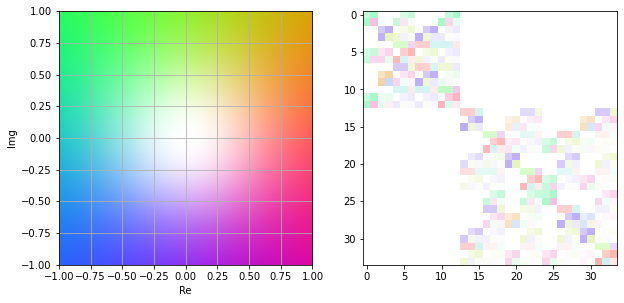

In [34]:
cplot(circuit.unitary())

In [38]:
import numpy as np
# Result of measurement
d = circuit.dim
result = circuit.run(shots=1000)

In [39]:
print(result)

{'counts': {'0': 167, '1': 247, '5': 100, '6': 138, '11': 137, '12': 211}, 'memory': array([ 5,  1,  6,  0, 12, 12,  0,  6,  6, 11,  1,  6, 11, 12,  0,  6,  6,
       12, 11,  0,  6,  6,  0,  1,  1,  0,  5,  1, 12, 12,  0,  5, 12, 11,
        1,  1,  0,  1,  1,  1, 12, 11,  1,  5,  1,  6, 12,  6,  1, 12, 11,
        1,  0,  6, 12, 11, 12, 12,  6,  0,  0,  5, 11, 12,  0,  1,  5, 12,
        1,  6,  6, 11, 12,  6, 11,  5, 11,  1,  1,  1,  6, 11,  0,  5,  1,
        5,  6,  6,  0,  1, 11,  0,  1,  0, 12, 12, 12, 12, 11,  1, 11,  0,
        0,  0,  5, 11, 12,  1, 11,  0,  1,  0,  0,  6, 12,  1, 12, 12,  5,
       12,  1, 12,  0,  6,  0,  5,  0, 12,  1,  5,  0, 12,  1,  5,  1, 11,
        0,  0,  0, 12,  0, 12, 12,  1,  0, 12, 11,  0,  1,  6, 11, 11,  5,
        1,  6, 11, 11,  6,  1,  1, 12,  1, 12, 11, 11,  0,  5,  1, 12,  1,
       12, 12,  5,  1, 12,  5,  1, 11,  1,  0,  1,  5, 11,  5,  5, 12, 12,
        1,  1,  6, 12,  5, 12,  1, 12,  5, 12,  0,  0,  1, 12,  6, 12, 12,
        0,  0, 

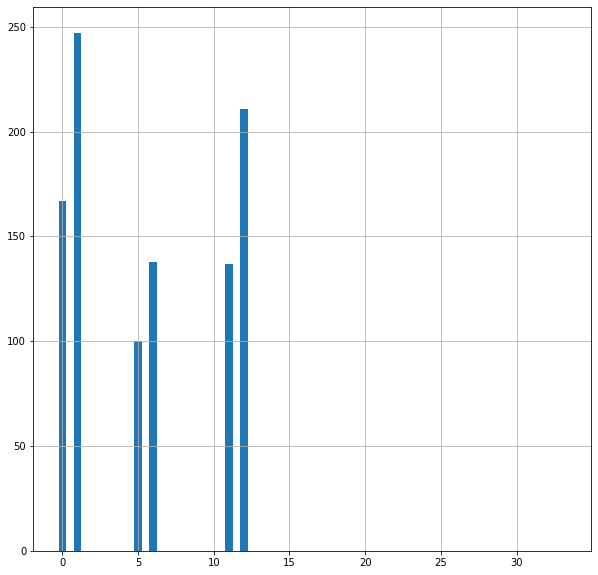

In [40]:
# Show the histogram of measurement results
import matplotlib.pyplot as plt
plt.hist(result['memory'], [ii for ii in range(d+1)], align='left', rwidth=0.5)
plt.grid()
plt.show()

### A Topological Bell Circuit: 

In [68]:
from tqsim import AnyonicCircuit, cplot

circuit = AnyonicCircuit(2, 3)
circuit.initialize([0,1,0,0,0,0,0,0,0,0,0,0,0])

In [69]:
circuit.dim

13

In [70]:
circuit.basis

[{'qudits': [[1, 0], [1, 0]], 'roots': [0]},
 {'qudits': [[0, 1], [0, 1]], 'roots': [0]},
 {'qudits': [[1, 1], [0, 1]], 'roots': [0]},
 {'qudits': [[0, 1], [1, 1]], 'roots': [0]},
 {'qudits': [[1, 1], [1, 1]], 'roots': [0]},
 {'qudits': [[0, 1], [1, 0]], 'roots': [1]},
 {'qudits': [[1, 1], [1, 0]], 'roots': [1]},
 {'qudits': [[1, 0], [0, 1]], 'roots': [1]},
 {'qudits': [[0, 1], [0, 1]], 'roots': [1]},
 {'qudits': [[1, 1], [0, 1]], 'roots': [1]},
 {'qudits': [[1, 0], [1, 1]], 'roots': [1]},
 {'qudits': [[0, 1], [1, 1]], 'roots': [1]},
 {'qudits': [[1, 1], [1, 1]], 'roots': [1]}]

In [71]:
# Hadamard sequence for qudit 1
had_sequence = [[1, 2], [2, 2], [1, -2], [2, -2], [1, 2], [2, 4], [1, -2], [2, 2],
                [1, 2], [2, -2], [1, 2], [2, -2], [1, 4]]

In [72]:
cnot_sequence = [[3, 1], [4, 1], [4, 1], [3, 1], [3, 1], [4, 1], [2, -1], [3, -1], [3, -1], [2, -1], [4, -1], [3, -1], [3, -1], [4, -1], [4, -1], [3, -1], [3, -1], [4, -1], [2, 1], [3, 1], [3, 1], [2, 1], [4, 1], [3, 1], [3, 1], [4, 1], [4, 1], [3, 1], [3, 1], [4, 1], [2, 1], [3, 1], [3, 1], [2, 1], [4, -1], [3, -1], [3, -1], [4, -1], [2, -1], [3, -1], [3, -1], [2, -1], [4, -1], [3, -1], [3, -1], [4, -1], [4, -1], [3, -1], [3, -1], [4, -1], [2, -1], [3, -1], [3, -1], [2, -1], [2, -1], [3, -1], [3, -1], [2, -1], [4, -1], [3, -1], [3, -1], [4, -1], [2, 1], [3, 1], [3, 1], [2, 1], [2, 1], [3, 1], [3, 1], [2, 1], [4, 1], [3, 1], [3, 1], [4, 1], [2, -1], [3, -1], [3, -1], [2, -1], [4, 1], [3, 1], [3, 1], [4, 1], [2, 1], [3, 1], [3, 1], [2, 1], [4, -1], [3, -1], [3, -1], [4, -1], [2, 1], [3, 1], [3, 1], [2, 1], [2, 1], [3, 1], [1, -1], [2, -1], [2, -1], [1, -1], [3, -1], [2, -1], [2, -1], [3, -1], [3, -1], [2, -1], [2, -1], [3, -1], [1, 1], [2, 1], [2, 1], [1, 1], [1, 1], [2, 1], [2, 1], [1, 1], [3, -1], [2, -1], [2, -1], [3, -1], [1, 1], [2, 1], [2, 1], [1, 1], [3, 1], [2, 1], [2, 1], [3, 1], [1, -1], [2, -1], [2, -1], [1, -1], [3, 1], [2, 1], [2, 1], [3, 1], [3, 1], [2, 1], [2, 1], [3, 1], [1, -1], [2, -1], [2, -1], [1, -1], [3, 1], [2, 1], [2, 1], [3, 1], [3, 1], [2, 1], [2, 1], [3, 1], [1, 1], [2, 1], [2, 1], [1, 1], [3, -1], [2, -1], [2, -1], [3, -1], [3, -1], [2, -1], [2, -1], [3, -1], [1, 1], [2, 1], [2, 1], [1, 1], [3, -1], [2, -1], [2, -1], [3, -1], [1, 1], [2, 1], [2, 1], [1, 1], [3, -1], [2, -1], [2, -1], [3, -1], [1, -1], [2, -1], [2, -1], [1, -1], [3, -1], [2, -1], [2, -1], [3, -1], [3, -1], [2, -1], [4, 1], [3, 1], [3, 1], [4, 1], [2, -1], [3, -1], [3, -1], [2, -1], [4, -1], [3, -1], [3, -1], [4, -1], [2, 1], [3, 1], [3, 1], [2, 1], [4, -1], [3, -1], [3, -1], [4, -1], [2, -1], [3, -1], [3, -1], [2, -1], [2, -1], [3, -1], [3, -1], [2, -1], [4, 1], [3, 1], [3, 1], [4, 1], [2, 1], [3, 1], [3, 1], [2, 1], [2, 1], [3, 1], [3, 1], [2, 1], [4, 1], [3, 1], [3, 1], [4, 1], [4, 1], [3, 1], [3, 1], [4, 1], [2, 1], [3, 1], [3, 1], [2, 1], [4, 1], [3, 1], [3, 1], [4, 1], [2, -1], [3, -1], [3, -1], [2, -1], [4, -1], [3, -1], [3, -1], [4, -1], [4, -1], [3, -1], [3, -1], [4, -1], [2, -1], [3, -1], [3, -1], [2, -1], [4, 1], [3, 1], [3, 1], [4, 1], [4, 1], [3, 1], [3, 1], [4, 1], [2, 1], [3, 1], [3, 1], [2, 1], [4, -1], [3, -1], [3, -1], [4, -1], [4, -1], [3, -1]]

In [73]:
# Computing Hadamard for qudit 2
had_sequence_2 = []
for sigma, power in had_sequence:
    had_sequence_2.append([sigma+3, power])

In [74]:
circuit.braid_sequence(had_sequence_2)
circuit.braid_sequence(cnot_sequence)
circuit.measure()

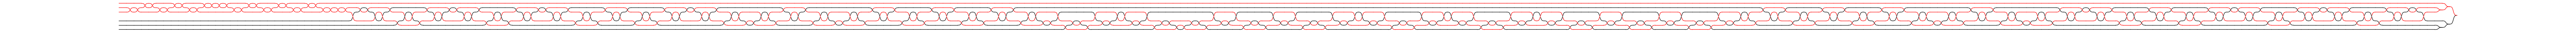

In [75]:
for i in [4,5,6]:
    circuit.drawer.anyons[i].color = 'r'
circuit.draw()

In [79]:
res = circuit.run(shots = 10**6)

In [80]:
print(res['counts'])

{'1': 503082, '3': 4, '4': 496914}


In [81]:
for i in res['counts']:
    print(circuit.basis[int(i)], ':', res['counts'][i])

{'qudits': [[0, 1], [0, 1]], 'roots': [0]} : 503082
{'qudits': [[0, 1], [1, 1]], 'roots': [0]} : 4
{'qudits': [[1, 1], [1, 1]], 'roots': [0]} : 496914
